In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from collections import Counter
import random
import colorsys
import umap
# bokeh basics
from bokeh.io import show, output_notebook
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
from bokeh.palettes import plasma
from bokeh.plotting import figure
from bokeh.transform import transform
import bokeh.models as bmo
import random
import colorsys
from numpy import matlib

import csv

np.random.seed(2)
random.seed(2)

def _get_colors(num_colors):
    colors=[]
    for i in np.arange(0., 360., 360. / num_colors):
        hue = i/360.
        lightness = (50 + np.random.rand() * 10)/100.
        saturation = (90 + np.random.rand() * 10)/100.
        colors.append(colorsys.hls_to_rgb(hue, lightness, saturation))
    return colors

thousand_colors = ['#%02x%02x%02x' % (int(c[0]*255), int(c[1]*255), int(c[2]*255)) for c in _get_colors(15)]
random.shuffle(thousand_colors)

In [6]:
df = pd.read_excel('Areas y población Mun_COL 2005_2017.xlsx').iloc[:-1,:]

### Import the data and load it in a dataframe of pandas 

In [7]:
df.head()

,DP,DPNOM,DPMP,MPIO,POBLACIÓN TOTAL 2005,POBLACIÓN CABECERA 2005,POBLACIÓN RESTO 2005,POBLACIÓN TOTAL 2017,POBLACIÓN CABECERA 2017,POBLACIÓN RESTO 2017,AREA EN KM2 CABECERA 2005,AREA EN KM2 CENTRO POBLADO 2005,AREA EN KM 2 RESTO 2005,AREA EN KM2 CABECERA 2017,AREA EN KM2 CENTRO POBLADO 2017,AREA EN KM 2 RESTO 2017
0,5,Antioquia,5001,Medellín,2214494,2175681,38813,2508452,2479990,28462,112.599136,3.333152,256.106044,109.980043,14.609643,242.850543
1,5,Antioquia,5002,Abejorral,20249,6271,13978,19096,6765,12331,1.153995,0.144522,505.945056,1.236794,0.106953,505.790367
2,5,Antioquia,5004,Abriaquí,2690,858,1832,2019,724,1295,0.531890,0.000000,287.578156,0.156826,0.029510,296.769644
3,5,Antioquia,5021,Alejandría,3816,1896,1920,3393,1804,1589,0.371011,0.000000,126.738351,0.399738,0.000000,128.532415
4,5,Antioquia,5030,Amagá,27155,14070,13085,29980,17174,12806,2.801529,0.130832,80.214944,1.509397,1.828286,80.794794


In [8]:
df.describe()

,DP,DPMP,POBLACIÓN TOTAL 2005,POBLACIÓN CABECERA 2005,POBLACIÓN RESTO 2005,POBLACIÓN TOTAL 2017,POBLACIÓN CABECERA 2017,POBLACIÓN RESTO 2017,AREA EN KM2 CABECERA 2005,AREA EN KM2 CENTRO POBLADO 2005,AREA EN KM 2 RESTO 2005,AREA EN KM2 CABECERA 2017,AREA EN KM2 CENTRO POBLADO 2017,AREA EN KM 2 RESTO 2017
count,1122.000000,1122.000000,1.122000e+03,1.122000e+03,1122.000000,1.122000e+03,1.122000e+03,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000
mean,38.282531,38716.410873,3.822513e+04,2.842184e+04,9803.291444,4.393192e+04,3.370415e+04,10227.770053,3.085113,0.456685,1013.052786,4.879983,0.915556,850.764482
std,26.588271,26574.905059,2.329032e+05,2.312218e+05,9926.745333,2.732377e+05,2.715673e+05,11762.363632,14.264436,1.105590,3211.782856,45.361030,1.756232,2937.666290
min,5.000000,5001.000000,0.000000e+00,0.000000e+00,0.000000,3.920000e+02,0.000000e+00,172.000000,0.000000,0.000000,0.000000,0.041805,0.000000,0.000000
25%,15.000000,15677.250000,6.817750e+03,1.693500e+03,4014.250000,6.697250e+03,1.911250e+03,3663.250000,0.306696,0.000000,127.820304,0.407813,0.050280,121.297972
50%,25.000000,25840.000000,1.251500e+04,4.158000e+03,7019.500000,1.357050e+04,5.013000e+03,6739.000000,0.697962,0.098596,280.058571,0.901225,0.310458,264.993219
75%,66.000000,66543.000000,2.384975e+04,1.079150e+04,12256.750000,2.685875e+04,1.319200e+04,12840.500000,1.805689,0.411744,706.791479,2.331975,0.965454,619.197173
max,99.000000,99773.000000,6.840116e+06,6.824507e+06,109982.000000,8.080734e+06,8.063991e+06,173143.000000,380.743770,14.012152,65560.804906,1432.794977,18.141420,65594.340099


### Make clustering with k means

Initially we will test using three clusters using different initial centroids so we can see if a three cluster system is actually a valid classification.

In [9]:
from sklearn.cluster import KMeans

In [10]:
def soft_clustering_weights(data, cluster_centres, **kwargs):
    
    """
    Function to calculate the weights from soft k-means
    data: Array of data. shape = N x F, for N data points and F Features
    cluster_centres: Array of cluster centres. shape = Nc x F, for Nc number of clusters. Input kmeans.cluster_centres_ directly.
    param: m - keyword argument, fuzziness of the clustering. Default 2
    """
    
    # Fuzziness parameter m>=1. Where m=1 => hard segmentation
    m = 2
    if 'm' in kwargs:
        m = kwargs['m']
    
    Nclusters = cluster_centres.shape[0]
    Ndp = data.shape[0]
    Nfeatures = data.shape[1]

    # Get distances from the cluster centres for each data point and each cluster
    EuclidDist = np.zeros((Ndp, Nclusters))
    for i in range(Nclusters):
        EuclidDist[:,i] = np.sum((data-np.matlib.repmat(cluster_centres[i], Ndp, 1))**2,axis=1)
    

    
    # Denominator of the weight from wikipedia:
    invWeight = EuclidDist**(2/(m-1))*np.matlib.repmat(np.sum((1./EuclidDist)**(2/(m-1)),axis=1).reshape(-1,1),1,Nclusters)
    Weight = 1./invWeight
    
    return Weight

In [11]:
#data = np.log(df.iloc[:, 4:].values + 1)
data = df.iloc[:, 4:].values
scaler = StandardScaler()
scaler.fit(data)
scaled = scaler.transform(data)

In [12]:
kmeans = KMeans(n_clusters=2, random_state=0,).fit(scaled)
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [25]:
scaled

array([[ 9.34825811e+00,  9.29071849e+00,  2.92368182e+00, ...,
         2.31800134e+00,  7.80090287e+00, -2.07029991e-01],
       [-7.72172377e-02, -9.58417953e-02,  4.20739129e-01, ...,
        -8.03511993e-02, -4.60624841e-01, -1.17483715e-01],
       [-1.52642690e-01, -1.19262657e-01, -8.03369667e-01, ...,
        -1.04170094e-01, -5.04740621e-01, -1.88667407e-01],
       ...,
       [-1.18596210e-01, -1.02081012e-01, -4.04773397e-01, ...,
         1.41427436e-02, -1.99692727e-01,  5.96181995e+00],
       [-1.50237185e-01, -1.14918569e-01, -8.48117263e-01, ...,
        -7.12135816e-02, -4.07060765e-01,  1.03723739e+00],
       [-4.08382779e-02, -1.04317958e-01,  1.47170295e+00, ...,
        -8.64920246e-02,  6.07893854e-01,  2.20489465e+01]])

In [32]:

for ii in range(2):
    df["p"+str(ii)]=0
df[["p0","p1"]]=soft_clustering_weights(scaled,kmeans.cluster_centers_,m=3)

/home/bigdata2/anaconda3/envs/vivaair/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/home/bigdata2/anaconda3/envs/vivaair/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply


In [34]:
df["p0"]

0       0.814363
1       0.999865
2       0.999577
3       0.999573
4       0.999841
          ...   
1117    0.999240
1118    0.993459
1119    0.983770
1120    0.999350
1121    0.851917
Name: p0, Length: 1122, dtype: float64

In [38]:
df['confidence'] = np.max(df[['p0', 'p1']].values, axis = 1)
df["class"] = kmeans.labels_

In [42]:
data = df[df["confidence"]>0.5].iloc[:, 4:].values
scaler = StandardScaler()
scaler.fit(data)
scaled = scaler.transform(data)

reducer = umap.UMAP(n_neighbors=3, min_dist=0.1)
embedding = reducer.fit_transform(scaled)

/home/bigdata2/anaconda3/envs/vivaair/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 8 separate connected components using meta-embedding (experimental)
  n_components


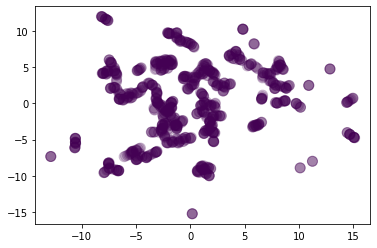

In [43]:
plt.scatter(*embedding.T, s=100, alpha=0.2,c=df[df['confidence'] > 0.5]["class"].values)
plt.show()

In [15]:
labels_string=[]
for ii in range(len(kmeans.labels_)):
    labels_string.append(str(kmeans.labels_[ii]))

In [16]:
logpop = np.power(df['POBLACIÓN TOTAL 2017'].values, 1/4)

source = ColumnDataSource(data=dict(x=embedding[:, 0], y=embedding[:, 1], desc=df['MPIO'],
                          size=logpop - min(logpop) + 1, clase=labels_string) )
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ('comentario', '@desc'),
    ('size', '@size'),
    ('clusterid','@clase')
])

palette = thousand_colors[:len(set(labels_string))]

color_map = bmo.CategoricalColorMapper(factors=list(set(labels_string)), palette=palette)


In [17]:
p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Comentarios")

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Municipios")
p.circle('x', 'y', size='size', source=source, alpha=0.5,fill_color=transform('clase', color_map))
output_file('log_data_with_features.html')
show(p)

In [176]:
"""
logpop = np.power(df['POBLACIÓN TOTAL 2017'].values, 1/4)

source = ColumnDataSource(data=dict(x=embedding[:, 0], y=embedding[:, 1], desc=df['MPIO'],
                          size=logpop - min(logpop) + 1) )
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ('comentario', '@desc'),
    ('size', '@size')
])

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Municipios")
p.circle('x', 'y', size='size', source=source, alpha=0.5)
output_file('raw_data.html')
show(p)
"""

'\nlogpop = np.power(df[\'POBLACIÓN TOTAL 2017\'].values, 1/4)\n\nsource = ColumnDataSource(data=dict(x=embedding[:, 0], y=embedding[:, 1], desc=df[\'MPIO\'],\n                          size=logpop - min(logpop) + 1) )\nhover = HoverTool(tooltips=[\n    ("index", "$index"),\n    (\'comentario\', \'@desc\'),\n    (\'size\', \'@size\')\n])\n\np = figure(plot_width=800, plot_height=800, tools=[hover, \'wheel_zoom\', \'pan\'], title="Municipios")\np.circle(\'x\', \'y\', size=\'size\', source=source, alpha=0.5)\noutput_file(\'raw_data.html\')\nshow(p)\n'

### Gap Statistics clustering of the data

The gap statistics criterion is tested in the scaled original data and the data with additional characteristics.

In [6]:
from gap import gap 

#### Original scaled data 

In [178]:
num_clusters,oldclusters,oldlabels,gaps,sk=gap(scaled,maxtime=8,file_save_data='scaled_data_report.txt')

1   -4.3479865989008175   0.018339899862721748
2   -3.070896423482714   0.01881010721300158
3   -2.803480825565577   0.030246462071458306
4   -2.603902388969703   0.04137798598246359
5   -2.467534100281002   0.04447673071936662
6   -2.117114061619607   0.05022129290655961
7   -1.9577448657432037   0.047288794599062836
8   -1.8205825011392778   0.046823917863695705
9   -1.6840323990588117   0.055158897654849035
10   -1.6066128730362468   0.04572221887196524
11   -2.0672861798063993   0.04590853640218871
12   -1.9135781444885334   0.04300310649016373
13   -1.9051094139868952   0.04358221123744409
14   -1.6139665007568798   0.0297185188076434
15   -1.595745919968488   0.0409393187857585
16   -1.636103027148168   0.046545753999936774
17   -1.4276652272249812   0.03833630887346063
18   -1.5674296386253876   0.039802368659130616
19   -1.4209472237219434   0.044460987599438846
20   -1.347096594271088   0.051425245416886374
21   -1.3236289111705024   0.045229359580781864
22   -1.30169250651578

In [179]:
plt.errorbar(num_clusters,gaps[:-1],color='red',yerr=sk[:-1],capsize=1.5,elinewidth=0.5)
legend = ['Gap']
plt.xlabel("Number of Clusters")
plt.ylabel("Gap")
plt.legend(legend)
#plt.xticks(range(0, 20))
#plt.yticks(range(1, 20))
plt.title("Gap vs Number of Clusters \n Scaled data")
#plt.ylim(0,200)
#plt.xlim(0.45,0.55)
plt.grid()
#image_name='Gap_vs_Number_Of_Clusters.pdf'
#plt.savefig(image_name,bbox_inches='tight')
plt.show()

The gap statistic criterion does not give a optimal number of clusters for the scaled data

#### Adding new features

An initial thing to do is to add features that are important in measuring the expansion of a town. In particular we add new variables
\begin{align}
\rho_\text{year} &= \frac{\text{population in year}}{\text{area in year}}\\
\Delta \text{population} &= \frac{\text{population in 2017}}{ \text{population in 2005}}\\
\Delta \text{area} &= \frac{\text{area in 2017} }{ \text{area in 2005}}\\
C &= \rho_{2017}-\rho_{2005}
\end{align}

In [44]:
df_augmented=df.copy(deep=True)

df_augmented['dens_2005_cab'] = df_augmented.iloc[:, 5].values/(df_augmented.iloc[:, 10].values + 1)
df_augmented['dens_2005_res'] = df_augmented.iloc[:, 6].values/(df_augmented.iloc[:, 12].values + 1)
df_augmented['dens_2017_cab'] = df_augmented.iloc[:, 8].values/(df_augmented.iloc[:, 13].values + 1)
df_augmented['dens_2017_res'] = df_augmented.iloc[:, 9].values/(df_augmented.iloc[:, 15].values + 1)

df_augmented['del_pop_tot'] = df_augmented.iloc[:, 7].values / (df_augmented.iloc[:, 4].values + 1)
df_augmented['del_pop_cab'] = df_augmented.iloc[:, 8].values / (df_augmented.iloc[:, 5].values + 1)
df_augmented['del_pop_res'] = df_augmented.iloc[:, 9].values / (df_augmented.iloc[:, 6].values + 1)

df_augmented['del_are_cab'] = df_augmented.iloc[:, 13].values / (df_augmented.iloc[:, 10].values + 1)
df_augmented['del_are_cen'] = df_augmented.iloc[:, 14].values / (df_augmented.iloc[:, 11].values + 1)
df_augmented['del_are_res'] = df_augmented.iloc[:, 15].values / (df_augmented.iloc[:, 12].values + 1)

df_augmented['c_cab'] = df_augmented['dens_2017_cab'].values - df_augmented['dens_2005_cab'].values
df_augmented['c_res'] = df_augmented['dens_2017_res'].values - df_augmented['dens_2005_res'].values

df_augmented=df_augmented[df_augmented['del_pop_tot']<5]
df_augmented=df_augmented[df_augmented['del_pop_cab']<5]
df_augmented=df_augmented[df_augmented['del_pop_res']<5]
df_augmented=df_augmented[df_augmented['del_are_cab']<5]
df_augmented=df_augmented[df_augmented['del_are_cen']<5]
df_augmented=df_augmented[df_augmented['del_are_res']<5]

In [45]:
df_augmented['MPIO'].values.shape

(1113,)

In [46]:
data = np.hstack((np.log(df_augmented.iloc[:, 4:16].values + 1), df_augmented.iloc[:, 16:]) )
#data = df.iloc[:, 4:]
scaler = StandardScaler()
scaler.fit(data)
augmented_scaled = scaler.transform(data)

In [183]:
num_clusters_augmented,oldclusters_augmented,oldlabels_augmented,gaps_augmented,sk_augmented=gap(augmented_scaled,maxtime=5,file_save_data='augmented_data_report.txt')

1   -2.7318306747258507   0.027313492373402987
2   -1.7366863531185939   0.028337614862144027
3   -1.4056851093908658   0.028048092120905425
4   -1.3523673795088924   0.10119677222047431
5   -1.4529004355352497   0.07384285908393075
6   -1.3734940324693672   0.040839985732380735
7   -1.2323095424454338   0.05457644341509643
8   -1.1256579559412185   0.05496221965773243
9   -1.0127498689991854   0.05440201935058999
10   -1.0316494044877482   0.04553280199675413
11   -0.9548990636451212   0.04360956989222226
12   -0.8934028117311003   0.04686194179367787
13   -0.8611661635841765   0.055745173269051464
14   -0.7712861233139867   0.038811402217787005
15   -0.7506919217941355   0.04379506326225231
16   -0.815899995986648   0.0332139357311162
17   -0.7516134956504632   0.04749960179016511
18   -0.7045671229671193   0.04247574873610071
19   -0.6977032959412202   0.04057643493427364
20   -0.6644974581273205   0.05103001256832014
21   -0.6426483999027043   0.03995416729112734


The gap statistic criterion does not give an optimal amount of clusters for the data

In [184]:
plt.errorbar(num_clusters_augmented,gaps_augmented[:-1],color='blue',yerr=sk_augmented[:-1],capsize=1.5,elinewidth=0.5)
legend = ['Gap']
plt.xlabel("Number of Clusters")
plt.ylabel("Gap")
plt.legend(legend)
#plt.xticks(range(0, 20))
#plt.yticks(range(1, 20))
plt.title("Gap vs Number of Clusters \n Scales augmented data")
#plt.ylim(0,200)
#plt.xlim(0.45,0.55)
plt.grid()
#image_name='Gap_vs_Number_Of_Clusters.pdf'
#plt.savefig(image_name,bbox_inches='tight')
plt.show()

#### Original data without scaling
The scaled data seems to have not a definite number of clusters hence we proceed to test the original data with the Gap Statistics criterion.

In [185]:
data = df.iloc[:, 4:].values
num_clusters_original,oldclusters_original,oldlabels_original,gaps_original,sk_original=gap(data,maxtime=5,file_save_data='original_data_report.txt')

1   -0.31577535899419473   0.03773816670251117
2   0.22123005003143792   0.05941134675400517
3   0.5044596444056157   0.08201685583397524
4   1.050572247696425   0.15833959039353557
5   1.0687918926339224   0.1840469264881848
6   0.9659664062913471   0.18111303974065868
7   1.0629547797056826   0.19758564405988438
8   0.6680379581985791   0.24580055036529708
9   0.6994718470360164   0.2595888412040448
10   0.507381942876254   0.23014607102152637
11   0.5203425375103707   0.24761674340205986
12   0.49712859518669283   0.1829134956893686
13   0.5368222864210894   0.21666157744688253
14   0.39330470498864667   0.15689800823966982
15   0.38946545035168967   0.209635848715373
16   0.3174048111257468   0.2060148697344666
17   0.5165440074922083   0.15769857313792573
18   0.42510595652553906   0.18201726107913985
19   0.41888777641497565   0.15972508912351255
20   0.2095773356055064   0.17020915111663082
21   0.2794310288467301   0.19857404094917838


In [186]:
plt.errorbar(num_clusters_original,gaps_original[:-1],color='blue',yerr=sk_original[:-1],capsize=1.5,elinewidth=0.5)
legend = ['Gap']
plt.xlabel("Number of Clusters")
plt.ylabel("Gap")
plt.legend(legend)
#plt.xticks(range(0, 20))
#plt.yticks(range(1, 20))
plt.title("Gap vs Number of Clusters \n Original data")
#plt.ylim(0,200)
#plt.xlim(0.45,0.55)
plt.grid()
#image_name='Gap_vs_Number_Of_Clusters.pdf'
#plt.savefig(image_name,bbox_inches='tight')
plt.show()

There is a global maximum of the gap statistic at 5 clusters, such that this clustering clasify the towns by size and amount of inhabitants. There is big cluster corresponding to the small towns, another cluster with only one element that correspond to the Bogotá D.C. and set of three intermediate clusters with intermediate size towns.

In [47]:
data = df.iloc[:, 4:].values
kmeans = KMeans(n_clusters=5, random_state=0,).fit(data)
reducer = umap.UMAP(n_neighbors=3, min_dist=0.1)
embedding = reducer.fit_transform(data)
plt.scatter(*embedding.T, s=100, alpha=0.2,c=kmeans.labels_)
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [188]:
labels_string=[]
for ii in range(len(kmeans.labels_)):
    labels_string.append(str(kmeans.labels_[ii]))
    
logpop = np.power(df['POBLACIÓN TOTAL 2017'].values, 1/4)

source = ColumnDataSource(data=dict(x=embedding[:, 0], y=embedding[:, 1], desc=df['MPIO'],
                          size=logpop - min(logpop) + 1, clase=labels_string) )
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ('comentario', '@desc'),
    ('size', '@size'),
    ('clusterid','@clase')
])

palette = thousand_colors[:len(set(labels_string))]

color_map = bmo.CategoricalColorMapper(factors=list(set(labels_string)), palette=palette)

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Comentarios")

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Municipios")
p.circle('x', 'y', size='size', source=source, alpha=0.5,fill_color=transform('clase', color_map))
output_file('original_data_with_features.html')
show(p)

#### Augmented original data without scaling
The scaled data seems to have not a definite number of clusters hence we proceed to test the original data with the Gap Statistics criterion.

In [189]:
data = np.hstack((np.log(df_augmented.iloc[:, 4:16].values + 1), df_augmented.iloc[:, 16:]) )
num_clusters_original_aug,oldclusters_original_aug,oldlabels_original_aug,gaps_original_aug,sk_original_aug=gap(data,maxtime=5,file_save_data='original_aug_data_report.txt')

1   0.4934822609378724   0.04142060803371455
2   0.5762303943564051   0.05535865461585178
3   0.5136697882752506   0.1382630118461763
4   0.4826830070564405   0.06787207483661062
5   0.39489847370513687   0.08700911137975077
6   1.14065767594556   0.06467414122304276
7   1.2509728398122948   0.06714746721631999
8   1.0929497738853193   0.16225350996953905
9   0.8696139353495926   0.15858588451131495
10   0.8155380672336117   0.16809784854250104
11   0.7754406384873471   0.1582225203446382
12   0.6393627026201592   0.10023037409937871
13   0.5874756327572759   0.08855635417789764
14   0.5297156490425352   0.10661078782067723
15   0.5896303650753465   0.10107141993299604
16   0.5523991998292104   0.11505707668514079
17   0.6057962714308518   0.1080792453633612
18   0.4561375278132438   0.08560282324703108
19   0.5124887607483171   0.11206233454305807
20   0.4904407309266041   0.11758900456843933
21   0.4541998677138559   0.07413105213768295
22   1.0899617173108824   0.0789833002424307
23

In [190]:
plt.errorbar(num_clusters_original_aug,gaps_original_aug[:-1],color='green',yerr=sk_original_aug[:-1],capsize=1.5,elinewidth=0.5)
legend = ['Gap']
plt.xlabel("Number of Clusters")
plt.ylabel("Gap")
plt.legend(legend)
#plt.xticks(range(0, 20))
#plt.yticks(range(1, 20))
plt.title("Gap vs Number of Clusters \n Original augmented data")
#plt.ylim(0,200)
#plt.xlim(0.45,0.55)
plt.grid()
#image_name='Gap_vs_Number_Of_Clusters.pdf'
#plt.savefig(image_name,bbox_inches='tight')
plt.show()

The optimal amount of clusters according to the gap statistic criterion is 9, however is not clear how the clustering is clasifying the data, so a better exploration of the clustering must be done. Is interesting to note that using 4 clusters with the augmented data gives a different classification than the one obtained with the original data, these 4 clusters divide the towns by size and amount of inhabitants. 

In [191]:
data = np.hstack((np.log(df_augmented.iloc[:, 4:16].values + 1), df_augmented.iloc[:, 16:]) )
kmeans = KMeans(n_clusters=4, random_state=0,).fit(data)
reducer = umap.UMAP(n_neighbors=3, min_dist=0.1)
embedding = reducer.fit_transform(data)
plt.scatter(*embedding.T, s=100, alpha=0.2,c=kmeans.labels_)
plt.show()

/home/lfardilap/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 39 separate connected components using meta-embedding (experimental)
  n_components
/home/lfardilap/.local/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [192]:
labels_string=[]
for ii in range(len(kmeans.labels_)):
    labels_string.append(str(kmeans.labels_[ii]))
    
logpop = np.power(df['POBLACIÓN TOTAL 2017'].values, 1/4)

source = ColumnDataSource(data=dict(x=embedding[:, 0], y=embedding[:, 1], desc=df['MPIO'],
                          size=logpop - min(logpop) + 1, clase=labels_string) )
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ('comentario', '@desc'),
    ('size', '@size'),
    ('clusterid','@clase')
])

palette = thousand_colors[:len(set(labels_string))]

color_map = bmo.CategoricalColorMapper(factors=list(set(labels_string)), palette=palette)

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Comentarios")

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Municipios")
p.circle('x', 'y', size='size', source=source, alpha=0.5,fill_color=transform('clase', color_map))
output_file('original_augmented_data_with_features.html')
show(p)

### Augmented and scaled data, reduced with UMAP to 5 dimensions

In [5]:
data = np.hstack((np.log(df_augmented.iloc[:, 4:16].values + 1), df_augmented.iloc[:, 16:]) )
#scaler = StandardScaler()
#scaler.fit(data)
#augmented_scaled = scaler.transform(data)
augmented_scaled = data
reducer = umap.UMAP(n_neighbors=50, min_dist=0, n_components=10, random_state=3)
embedded = reducer.fit_transform(data)

In [194]:
num_clusters_aug_red, oldclusters_aug_red, oldlabels_aug_red, gaps_aug_red, sk_aug_red = gap(embedded,maxtime=2,file_save_data='scaled_aug_red_data_report.txt')

1   -0.09291627394414415   0.029331745521784885
2   -0.2693105608401867   0.1142976370206146
3   0.13747956381880178   0.12359115337373586
4   0.3218424614924178   0.10642618387242499
5   0.31479692225212164   0.12095556180571998
6   1.6927109493704549   0.10389537937823713
7   1.6709353577951953   0.08398990569588477
8   1.5858306925764243   0.08700670547368229
9   1.6285056959064104   0.10036040966368133


In [200]:
plt.errorbar(num_clusters_aug_red, gaps_aug_red[:-1], color='green',yerr=sk_aug_red[:-1],capsize=1.5,elinewidth=0.5)
legend = ['Gap']
plt.xlabel("Number of Clusters")
plt.ylabel("Gap")
plt.legend(legend)
#plt.xticks(range(0, 20))
#plt.yticks(range(1, 20))
plt.title("Gap vs Number of Clusters \n Original augmented data")
#plt.ylim(0,200)
#plt.xlim(0.45,0.55)
plt.grid()
#image_name='Gap_vs_Number_Of_Clusters.pdf'
#plt.savefig(image_name,bbox_inches='tight')
plt.show()

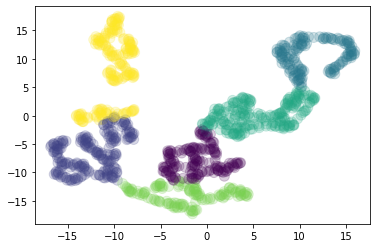

In [6]:
kmeans = KMeans(n_clusters=6, random_state=0,).fit(embedded)
reducer = umap.UMAP(n_neighbors=20, min_dist=0.9,n_components=2)
embedding = reducer.fit_transform(embedded)
plt.scatter(*embedding.T,s=100,alpha=0.2,c=kmeans.labels_)
plt.savefig('una.png')

In [204]:
kmeans = KMeans(n_clusters=6, random_state=0,).fit(embedded)
reducer = umap.UMAP(n_neighbors=20, min_dist=0.9,n_components=3)
embedding = reducer.fit_transform(embedded)
plt.scatter(*embedding.T,alpha=0.2,c=kmeans.labels_)
plt.show()

/home/lfardilap/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [205]:
from mpl_toolkits import mplot3d
%matplotlib qt

In [206]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(*embedding.T,s=100,alpha=0.2,c=kmeans.labels_)
plt.savefig('dos.png')

# Extracción de labels en un archivo .csv

In [21]:
df_with_clusters = df.copy()
df_with_clusters = df_with_clusters.loc[df_augmented.index]
df_with_clusters['labels'] = kmeans.labels_

In [23]:
df_with_clusters.to_excel('Municipios_con_clusters.xlsx')

In [24]:
Counter(kmeans.labels_)

Counter({5: 192, 3: 149, 2: 158, 0: 218, 1: 223, 4: 173})

In [12]:
write_file = "labels.csv"

labels = zip(df_augmented['MPIO'].values, kmeans.labels_)

with open(write_file, "w") as output:
    for i, j in labels:
        #print(i+', '+str(j))
        output.write(i.replace(',',"")+', '+str(j)+'\n')

#with open(write_file, "w") as output:
#dict(zip(df_augmented['MPIO'].values, kmeans.labels_))

In [7]:
labels_string=[]
for ii in range(len(kmeans.labels_)):
    labels_string.append(str(kmeans.labels_[ii]))
    
logpop = np.power(df_augmented['POBLACIÓN TOTAL 2017'].values, 1/4)
pop = df_augmented['POBLACIÓN TOTAL 2017'].values

source = ColumnDataSource(data=dict(x=embedding[:, 0], y=embedding[:, 1], desc=df_augmented['MPIO'],
                          size=logpop - min(logpop) + 1, clase=labels_string,
                         realsize=pop))
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ('comentario', '@desc'),
    ('size', '@realsize'),
    ('clusterid','@clase')
])

palette = thousand_colors[:len(set(labels_string))]

color_map = bmo.CategoricalColorMapper(factors=list(set(labels_string)), palette=palette)

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Comentarios")

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Municipios")
p.circle('x', 'y', size='size', source=source, alpha=0.5,fill_color=transform('clase', color_map))
output_file('scaled_augmented_reduced_data_with_features.html')
show(p)

In [18]:
printdict = {s:c for s,c in zip(list(set(labels_string)), palette)}
print(printdict)

{'4': '#3481f5', '5': '#cbfa0f', '0': '#0cf86b', '2': '#ca0bf9', '3': '#2424f4', '1': '#0cfccc'}


Histograms to each closter

In [157]:
#mask for each closter
mask_0=kmeans.labels_==0
mask_1=kmeans.labels_==1
mask_2=kmeans.labels_==2
mask_3=kmeans.labels_==3
mask_4=kmeans.labels_==4
mask_5=kmeans.labels_==5

rho_2005_cab_0=df_augmented['dens_2005_cab'][mask_0]
rho_2005_cab_1=df_augmented['dens_2005_cab'][mask_1]
rho_2005_cab_2=df_augmented['dens_2005_cab'][mask_2]
rho_2005_cab_3=df_augmented['dens_2005_cab'][mask_3]
rho_2005_cab_4=df_augmented['dens_2005_cab'][mask_4]
rho_2005_cab_5=df_augmented['dens_2005_cab'][mask_5]

rho_2017_cab_0=df_augmented['dens_2017_cab'][mask_0]
rho_2017_cab_1=df_augmented['dens_2017_cab'][mask_1]
rho_2017_cab_2=df_augmented['dens_2017_cab'][mask_2]
rho_2017_cab_3=df_augmented['dens_2017_cab'][mask_3]
rho_2017_cab_4=df_augmented['dens_2017_cab'][mask_4]
rho_2017_cab_5=df_augmented['dens_2017_cab'][mask_5]


In [158]:
fig, axs = plt.subplots(2, 3, tight_layout=True,figsize=(13, 8))
axs[0,0].hist2d(rho_2005_cab_0,rho_2017_cab_0,bins=40, alpha=1, edgecolor = 'black',  linewidth=1)
axs[0,1].hist2d(rho_2005_cab_1,rho_2017_cab_1,bins=40, alpha=1, edgecolor = 'black',  linewidth=1)
axs[0,2].hist2d(rho_2005_cab_2,rho_2017_cab_2,bins=40, alpha=1, edgecolor = 'black',  linewidth=1)
axs[1,0].hist2d(rho_2005_cab_3,rho_2017_cab_3,bins=40, alpha=1, edgecolor = 'black',  linewidth=1)
axs[1,1].hist2d(rho_2005_cab_4,rho_2017_cab_4,bins=40, alpha=1, edgecolor = 'black',  linewidth=1)
axs[1,2].hist2d(rho_2005_cab_5,rho_2017_cab_5,bins=40, alpha=1, edgecolor = 'black',  linewidth=1)
#plt.ylabel('frecuency of delta de pobalcion')

plt.show()


In [159]:
mask_0=kmeans.labels_==0
mask_1=kmeans.labels_==1
mask_2=kmeans.labels_==2
mask_3=kmeans.labels_==3
mask_4=kmeans.labels_==4
mask_5=kmeans.labels_==5
x0=df_augmented['del_are_cab'][mask_0]
x1=df_augmented['del_are_cab'][mask_1]
x2=df_augmented['del_are_cab'][mask_2]
x3=df_augmented['del_are_cab'][mask_3]
x4=df_augmented['del_are_cab'][mask_4]
x5=df_augmented['del_are_cab'][mask_5]

y0=df_augmented['del_pop_tot'][mask_0]
y1=df_augmented['del_pop_tot'][mask_1]
y2=df_augmented['del_pop_tot'][mask_2]
y3=df_augmented['del_pop_tot'][mask_3]
y4=df_augmented['del_pop_tot'][mask_4]
y5=df_augmented['del_pop_tot'][mask_5]


In [160]:
fig, axs = plt.subplots(2, 3, tight_layout=True,figsize=(13, 8))
axs[0,0].hist2d(x0,y0,bins=40, alpha=1, edgecolor = 'black',  linewidth=1)
axs[0,1].hist2d(x1,y1,bins=40, alpha=1, edgecolor = 'black',  linewidth=1)
axs[0,2].hist2d(x2,y2,bins=40, alpha=1, edgecolor = 'black',  linewidth=1)
axs[1,0].hist2d(x3,y3,bins=40, alpha=1, edgecolor = 'black',  linewidth=1)
axs[1,1].hist2d(x4,y4,bins=40, alpha=1, edgecolor = 'black',  linewidth=1)
axs[1,2].hist2d(x5,y5,bins=40, alpha=1, edgecolor = 'black',  linewidth=1)
#plt.ylabel('frecuency of delta de pobalcion')

plt.show()

In [161]:

df_augmented[df_augmented['del_are_cab']>10].hist('del_are_cab',bins=40)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e0228e128>]],
      dtype=object)

In [162]:
for i,j in df_augmented[df_augmented['del_are_cab']>10].to_dict().items():
    print(i,j)

DP {}
DPNOM {}
DPMP {}
MPIO {}
POBLACIÓN TOTAL 2005 {}
POBLACIÓN CABECERA 2005 {}
POBLACIÓN RESTO 2005 {}
POBLACIÓN TOTAL 2017 {}
POBLACIÓN CABECERA 2017 {}
POBLACIÓN RESTO 2017 {}
AREA EN KM2 CABECERA 2005 {}
AREA EN KM2 CENTRO POBLADO 2005 {}
AREA EN KM 2 RESTO 2005 {}
AREA EN KM2 CABECERA 2017 {}
AREA EN KM2 CENTRO POBLADO 2017 {}
AREA EN KM 2 RESTO 2017 {}
dens_2005_cab {}
dens_2005_res {}
dens_2017_cab {}
dens_2017_res {}
del_pop_tot {}
del_pop_cab {}
del_pop_res {}
del_are_cab {}
del_are_cen {}
del_are_res {}
c_cab {}
c_res {}


In [163]:
mask_0=kmeans.labels_==0 & df_augmented['del_are_cab']<3
mask_1=kmeans.labels_==1
mask_2=kmeans.labels_==2
mask_3=kmeans.labels_==3
mask_4=kmeans.labels_==4
mask_5=kmeans.labels_==5
df_augmented[mask_0]

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

In [59]:
df_augmented[df_augmented['del_are_cab']<3]

,DP,DPNOM,DPMP,MPIO,POBLACIÓN TOTAL 2005,POBLACIÓN CABECERA 2005,POBLACIÓN RESTO 2005,POBLACIÓN TOTAL 2017,POBLACIÓN CABECERA 2017,POBLACIÓN RESTO 2017,...,dens_2017_cab,dens_2017_res,del_pop_tot,del_pop_cab,del_pop_res,del_are_cab,del_are_cen,del_are_res,c_cab,c_res
0,5,Antioquia,5001,Medellín,2214494,2175681,38813,2508452,2479990,28462,...,22346.269951,116.719035,1.132742,1.139868,0.733292,0.968142,3.371597,0.944554,3194.002796,-34.242022
1,5,Antioquia,5002,Abejorral,20249,6271,13978,19096,6765,12331,...,3024.417984,24.331560,0.943012,1.078603,0.882109,0.574186,0.093448,0.997722,113.083918,-3.241448
2,5,Antioquia,5004,Abriaquí,2690,858,1832,2019,724,1295,...,625.850387,4.348999,0.750279,0.842841,0.706492,0.102374,0.029510,1.028386,65.757856,-1.999367
3,5,Antioquia,5021,Alejandría,3816,1896,1920,3393,1804,1589,...,1288.812621,12.267200,0.888918,0.950975,0.827173,0.291565,0.000000,1.006216,-94.108953,-2.763525
4,5,Antioquia,5030,Amagá,27155,14070,13085,29980,17174,12806,...,6843.875242,156.562531,1.103992,1.220524,0.978603,0.397050,1.616762,0.994827,3142.733192,-4.553138
5,5,Antioquia,5031,Amalfi,20525,10936,9589,22414,12477,9937,...,4726.066547,8.222886,1.091981,1.140806,1.036184,0.100417,0.029874,1.009390,4056.471293,0.206827
6,5,Antioquia,5034,Andes,41591,19176,22415,46621,23365,23256,...,7857.703761,57.984575,1.120913,1.218387,1.037473,0.543071,0.342404,0.891722,2580.861740,8.023698
7,5,Antioquia,5036,Angelópolis,7641,4150,3491,9216,5461,3755,...,3082.277216,45.854705,1.205967,1.315587,1.075315,0.376051,0.215471,0.986705,1060.083767,3.270638
8,5,Antioquia,5038,Angostura,12519,2096,10423,11139,1775,9364,...,1197.602366,27.615190,0.889696,0.846447,0.898312,0.321205,0.089806,1.062815,-198.801828,-5.150536
9,5,Antioquia,5040,Anorí,15016,5280,9736,17521,7042,10479,...,3063.925174,7.413641,1.166744,1.333460,1.076204,0.423495,0.000000,1.000002,1341.708733,0.520766


In [60]:
mask_0=kmeans.labels_==0
mask_1=kmeans.labels_==1
mask_2=kmeans.labels_==2
mask_3=kmeans.labels_==3
mask_4=kmeans.labels_==4
mask_5=kmeans.labels_==5
x0=df_augmented['c_cab'][mask_0]
x1=df_augmented['c_cab'][mask_1]
x2=df_augmented['c_cab'][mask_2]
x3=df_augmented['c_cab'][mask_3]
x4=df_augmented['c_cab'][mask_4]
x5=df_augmented['c_cab'][mask_5]

fig, axs = plt.subplots(2, 3, tight_layout=True,figsize=(13, 8))
axs[0,0].hist(x0,bins=40, alpha=1, edgecolor = 'black',  linewidth=1)
axs[0,1].hist(x1,bins=40, alpha=1, edgecolor = 'black',  linewidth=1)
axs[0,2].hist(x2,bins=40, alpha=1, edgecolor = 'black',  linewidth=1)
axs[1,0].hist(x3,bins=40, alpha=1, edgecolor = 'black',  linewidth=1)
axs[1,1].hist(x4,bins=40, alpha=1, edgecolor = 'black',  linewidth=1)
axs[1,2].hist(x5,bins=40, alpha=1, edgecolor = 'black',  linewidth=1)
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1113 but corresponding boolean dimension is 1122